<a href="https://colab.research.google.com/github/imugagga/Sales-Predictions---JFood-Sores/blob/main/Sales_Predictions_Mugagga_Innocent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sales-Predictions---JFood-Sores**

In [2]:
#Mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
#Read the data to the colab notebook
filepath = '/content/drive/MyDrive/Colab Notebooks/Week 1/Uploaded Data/sales_predictions.csv'
df = pd.read_csv(filepath)

In [5]:
#View Data Head
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [6]:
#View Data tail
df.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


*Data Inspection*

In [7]:
# No. rows and columns?
df.shape

(8523, 12)

In [8]:
#length of data
len(df)

8523

In [9]:
# Datatypes of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
# Checking for duplicates
df.duplicated().sum()

0

In [11]:
#View Columns with missing Values
df.isnull().sum()   # 2 columns with missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#Inspect the number of unique values in each of the columns 
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
#Inspect the number of unique values in each of the columns with missing data.
df[['Item_Weight','Outlet_Size']].nunique()

Item_Weight    415
Outlet_Size      3
dtype: int64

In [14]:
#Impect the columns with the missing values
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

*Address the missing values and do it! (This requires your judgement, so explain your choice).*

In [15]:
#For the Column 'Outlet_Size'

#View the percentage of missing data 
#Count the Non null Value
Non_nullcells = df['Outlet_Size'].count()

#Obtain the length of the column
Totalcells = len(df['Outlet_Size'])
#Calculate the percentage of the missing data
Empty_cells = Totalcells - Non_nullcells
Percent = ((Empty_cells/Totalcells)*100).round(2)
print(f'The empty cells are {Empty_cells} and they are {Percent}% of the data in the column')

The empty cells are 2410 and they are 28.28% of the data in the column


In [16]:
#Relating the Column with the 'Outlet_size' column

df.groupby(['Outlet_Size'])['Outlet_Type'].value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type3     935
             Supermarket Type1     930
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store         528
Name: Outlet_Type, dtype: int64

***Explanation for Outlet_Size:***

From the observation above the most supermarkets are of the medium size and thus the missing values in this column shall be filled with the medium size  obtained using the mode function so as not to loose the data in this column.

1. The Missing data is a small percentage ie 28.28 % of the data in the column 
2. Droping the column would mean loosing the entire column attribute of the data
3. Dropping the rows would mean loosing all sale details from 2410 entries from the data set. 

In [17]:
#For the Column 'Item_Weight'

#View the percentage of missing data 
#Count the Non null Value
Non_nullcells1 = df['Item_Weight'].count()

#Obtain the length of the column
Totalcells1 = len(df['Item_Weight'])
#Calculate the percentage of the missing data
Empty_cells1 = Totalcells1 - Non_nullcells1
Percent1 = ((Empty_cells1/Totalcells1)*100).round(2)
print(f'The empty cells are {Empty_cells1} and they are {Percent1}% of the data in the column')

The empty cells are 1463 and they are 17.17% of the data in the column


***Explanation for Item_Weight:***

Since the Weight of the items purchased is numeriacal and it's a very important attribute, it will help to tell consumption patterns and further analysis in future , i dont want to drop the column thus i have chosen to replace the missing values with the median of the column data.

1. The Missing data is a small percentage ie 17.17 % of the data in the column
2. Droping the column would mean loosing the entire column attribute of the data
3. Dropping the rows would mean loosing all sale details from 1463 entries from the data set.

In [18]:
#Obtaining the mode of the column 'Outlet_Size'.
Size_mode = df['Outlet_Size'].mode()[0]

#Filling empty cells
df['Outlet_Size'].fillna(Size_mode,inplace=True)

print('Mode used is: ',Size_mode)

Mode used is:  Medium


In [19]:
#Obtaining the Median of the column 'Item_Weight'.
Weight_median = df['Item_Weight'].median()

#Filling empty cells
df['Item_Weight'].fillna(Weight_median,inplace=True)

print('Median used is: ',Weight_median)

Median used is:  12.6


In [20]:
#Inspecting the cleaned dataframe
df.isnull().sum()
#From this the outpuit confirms that all missing values have been filled up.

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

***Checking for any inconsistances in the Data***

In [21]:
#Selecting columns with object data type
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Identifier       8523 non-null   object
 1   Item_Fat_Content      8523 non-null   object
 2   Item_Type             8523 non-null   object
 3   Outlet_Identifier     8523 non-null   object
 4   Outlet_Size           8523 non-null   object
 5   Outlet_Location_Type  8523 non-null   object
 6   Outlet_Type           8523 non-null   object
dtypes: object(7)
memory usage: 466.2+ KB


In [22]:
df.select_dtypes(include=['object']).nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [23]:
#Identifying the inconsistent data in the column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
#Fixing the inconsistent data using the replace function.
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat').replace('reg','Regular')

In [25]:
#Confirming that the  column data is consistent
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
#Obtain the summary statistics for numerical columns.
df.describe().round(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000,8523.000,8523.000,8523.000,8523.000
mean,12.813,0.066,140.993,1997.832,2181.289
std,4.227,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,9.310,0.027,93.826,1987.000,834.247
50%,12.600,0.054,143.013,1999.000,1794.331
75%,16.000,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


In [27]:
#View a sample of the Cleaned Dataframe
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


*1. Histogram to view the distributions of various features in the dataset.*

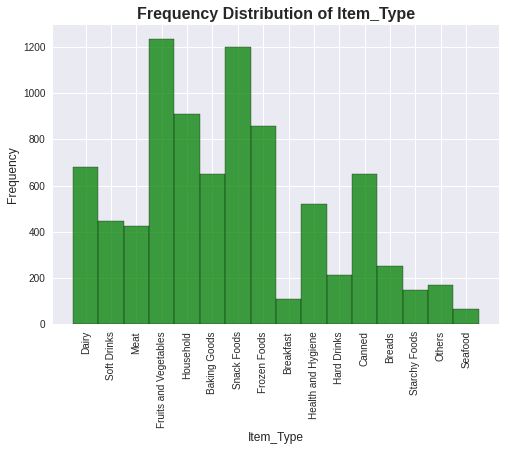

In [28]:
#Using a Histogram  to show the Frequency of Requests by Item type 
plt.style.use('seaborn')
sns.histplot(data = df['Item_Type'],color='green')
plt.xticks(rotation = 90)
plt.xlabel('Item_Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency Distribution of Item_Type',fontweight='bold',fontsize=16)
plt.show()

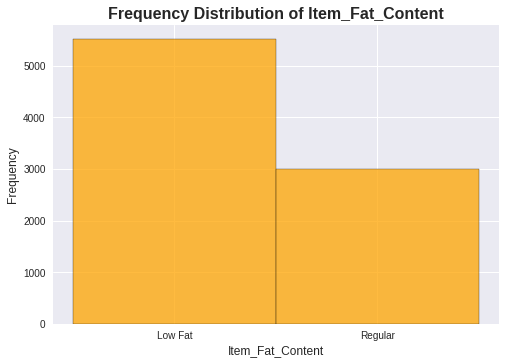

In [29]:
#Using a Histogram  to show the Frequency of Requests by Item type 
plt.style.use('seaborn')
sns.histplot(data = df['Item_Fat_Content'],color='Orange')
plt.xticks(rotation = 0)
plt.xlabel('Item_Fat_Content', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency Distribution of Item_Fat_Content',fontweight='bold',fontsize=16)
plt.show()

# Comments from the Plots:

*Frequency Distribution of Item_Type*
1. It can be observed that Fruits and Vegetables are most frequently requested and are the main driving items for the overall sales, followed by Snack Foods and in a very close range and then Household. These items should be stocked more often.
2. Seafood and Breakfast have very little contribution to the overall sales.

*Frequency Distribution of Item_Fat_Content*
1. Thew graph indicates that there is a higher demand for items of Low Fat content than the Regular content.

In [30]:
#The same can also be observed by  taking a count on the Items.
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

*2. Boxplot to view statistical summaries of various features in your dataset.*

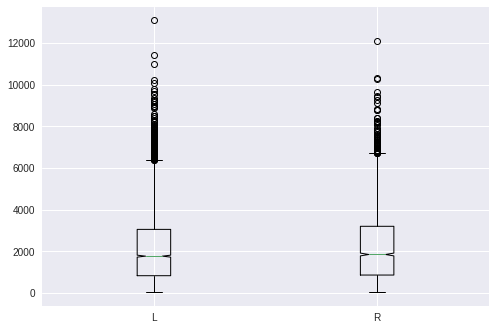

In [31]:
#Using a Boxplot to show the consumption of the top 4 items based on Weights of items purchased.
Lowfat = df.loc[df['Item_Fat_Content']=='Low Fat','Item_Outlet_Sales'].values
Regular = df.loc[df['Item_Fat_Content']=='Regular','Item_Outlet_Sales'].values
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([Lowfat,Regular], notch = True, labels=['L', 'R'])
plt.show()

Explanation:
 Both the Low fat and Reguilar items have the same median  but there are sdo many outliers.

*3. Heatmap of the correlation between features.*

In [32]:
#Adding a new column to categorise Fat content
df['Fat_Content'] = df['Item_Fat_Content'].apply(lambda x: 1 if x=='Low Fat' else(2))
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2


<AxesSubplot:>

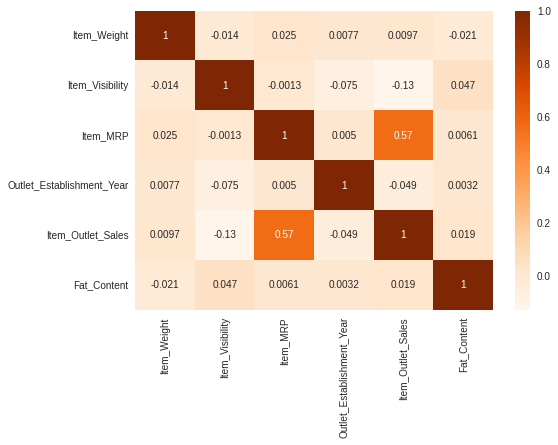

In [33]:
#Correlation  heatmap using the Pearson method
Corr = df.corr(method='pearson')
sns.heatmap(Corr,cmap = 'Oranges',annot=True)

<AxesSubplot:>

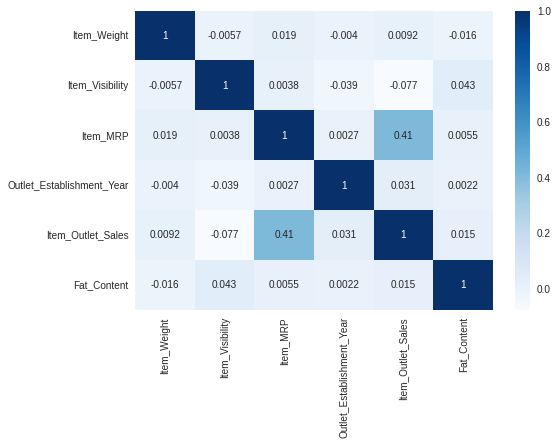

In [34]:
#Correlation  heatmap using the kendall method
Corr = df.corr(method='kendall')
sns.heatmap(Corr,cmap = 'Blues',annot=True)

<AxesSubplot:>

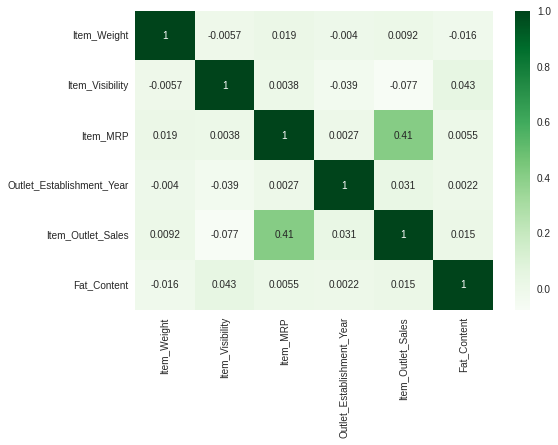

In [35]:
#Correlation  heatmap
Corr = df.corr(method='kendall')
sns.heatmap(Corr,cmap = 'Greens',annot=True)

# Explanation:
1. From the heat maps there is a moderate correlation between the Item_MRP and the item Outlet sales. 
2. There is very little correlation between the the rest of the items.


In [36]:
#View the Datahead
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1


In [37]:
#View Stores performance by Size
GroupedSales =  df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()
Outletsize = list(GroupedSales.index)
Outletsize

['High', 'Medium', 'Small']

In [38]:
Outletsales = list(GroupedSales.values)
Outletsales

[2142663.5782, 11882249.635, 4566212.1972]

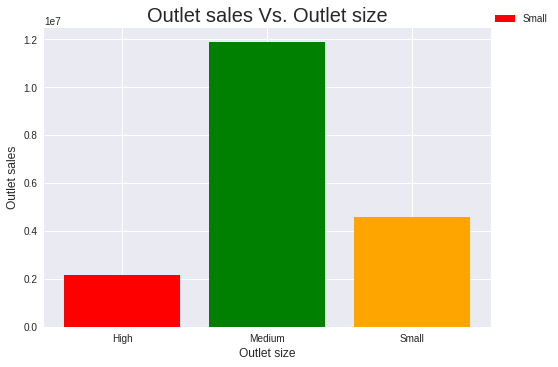

In [39]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a bar plot
ax.bar(Outletsize, Outletsales, color=['red', 'green', 'orange'])

# Set the legend
plt.legend(['Small', 'Medium', 'Large'], loc=(1,1))
#ax.set_legend(['Small', 'Medium', 'Large'])

# Set the axis labels and title
ax.set_xlabel('Outlet size', fontsize=12)
ax.set_ylabel('Outlet sales', fontsize=12)
ax.set_title('Outlet sales Vs. Outlet size', fontsize=20)

# Show the plot
plt.show()

# Observation:
The Medium sized outlets have done hightest with sales, followed by the small sized outlets. 

In [40]:
# Understanding the performance of the top 3 items in the differnt stores

#Finding the Top sales Items in Descending Order
Groupedsales = df.groupby('Item_Type').agg({'Item_Type':'first','Item_Outlet_Sales':'sum'})
#Sort sales in Descending Order
Groupedsales = pd.DataFrame(Groupedsales['Item_Outlet_Sales'].astype(int).sort_values(ascending=False))
Groupedsales.reset_index()

,Item_Type,Item_Outlet_Sales
0,Fruits and Vegetables,2820059
1,Snack Foods,2732786
2,Household,2055493
3,Frozen Foods,1825734
4,Dairy,1522594
5,Canned,1444151
6,Baking Goods,1265525
7,Health and Hygiene,1045200
8,Meat,917565
9,Soft Drinks,892897


In [41]:
#Taking the top 6 selling Items that made bove 1.800,000 sales
Topitems_df = Groupedsales[Groupedsales['Item_Outlet_Sales']>1800000]
Topitems = list(Topitems_df.index)
Topitems

['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods']

In [42]:
#DataFrame for Top items
df3 = df[df['Item_Type'].isin(Topitems)]
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat_Content
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,2
7,FDP10,12.60,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,2


In [43]:
Pivot_table = df3.pivot_table(index='Item_Type', columns='Outlet_Identifier',values ='Item_Outlet_Sales', aggfunc='sum')
Pivot_table

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Type,,,,,,,,,,
Frozen Foods,17942.6442,203696.8494,239347.1104,183599.0106,15252.8122,316272.3108,213487.4384,177020.2408,243236.7140,215879.6578
Fruits and Vegetables,24548.0460,341526.7706,319504.1040,263471.7076,24054.0224,576028.1886,304647.4428,326414.4422,304751.3076,335113.7850
Household,25550.0750,248046.4532,222526.3392,196267.1872,18157.0318,378299.5704,269852.7348,222456.4302,219520.2522,254817.6392
Snack Foods,25942.8970,309246.1234,311071.0812,278714.5328,25653.2740,513088.1172,355573.8190,288438.5418,274813.6106,350244.0900


Text(0.5, 1.0, 'OUTLET PERFORMANCE ON TOP ITEMS')

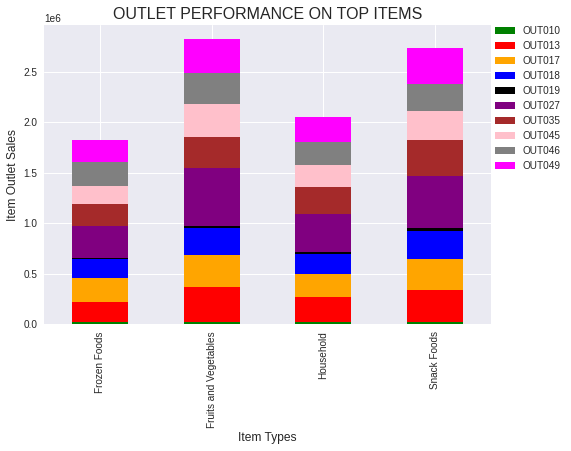

In [51]:
# Make the style by default seaborn
plt.style.use('seaborn')
Pivot_table.plot(kind = 'bar', stacked=True, color = ['Green','Red','Orange','Blue','Black','Purple','Brown','Pink','Grey','Magenta'])
plt.legend(loc=[1,0.5])
plt.xlabel('Item Types', fontsize = 12)
plt.ylabel('Item Outlet Sales', fontsize = 12)
plt.title('OUTLET PERFORMANCE ON TOP ITEMS', fontsize = 16)

# Observation.
    1. From the plot. The outlet OUT027, has contributed the most towards the sales,and most of the sales in all the top items selected in from the items sold.
    2. In all stores, the fruits and vegetables together with the Snack Foods contibute to the most sales. while the frozen Foods and the HouseHold items are in a close range.
    3. Outlets OUT10 and OUT19  are contibuting very less  to the sales as compared with the other outlets in the selected items.  